## IBM HR Attrition Data Analysis

In [35]:
# importing the libraries and reading the data file
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('IBM Attrition Data 2.csv')
dataset.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [36]:
# Check for Null values
dataset.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [37]:
# Basic checks for data type and counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [38]:
dataset.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


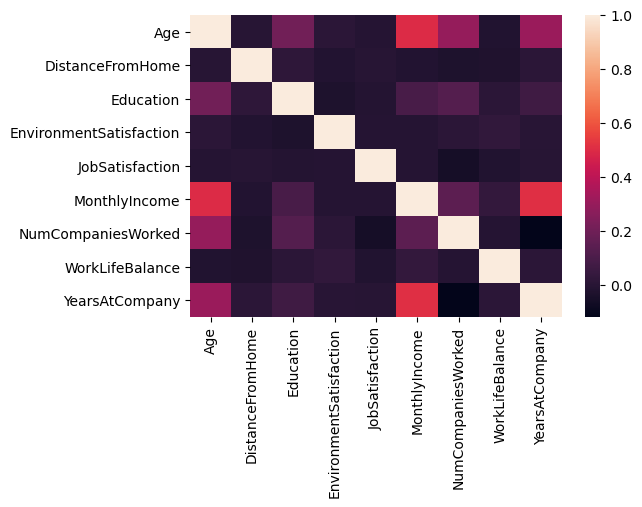

In [39]:
# Plotting the correlation matrix with non-categorical(numeric) columns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (6,4), dpi=100)
sns.heatmap(dataset.corr())

#### The variables which are not poorly correlated(i.e correlation value tend towards 0), we will pick those variables and move forward with them and will leave the ones which are strongly correlated(i.e correlation value tend towards be 1).

In [6]:
# Grouping the Categorical variables
hr_cat = dataset[['Attrition','Department','EducationField','MaritalStatus']].copy()
hr_cat.head()

,Attrition,Department,EducationField,MaritalStatus
0,Yes,Sales,Life Sciences,Single
1,No,Research & Development,Life Sciences,Married
2,Yes,Research & Development,Other,Single
3,No,Research & Development,Life Sciences,Married
4,No,Research & Development,Medical,Married


In [7]:
# Label encoding the "Attrition" categorical column
Num_val = {'Yes':1, 'No':0}
hr_cat['Attrition'] = hr_cat["Attrition"].apply(lambda x: Num_val[x])
hr_cat.head()

,Attrition,Department,EducationField,MaritalStatus
0,1,Sales,Life Sciences,Single
1,0,Research & Development,Life Sciences,Married
2,1,Research & Development,Other,Single
3,0,Research & Development,Life Sciences,Married
4,0,Research & Development,Medical,Married


In [8]:
# OneHot encoding the rest of the categorical columns and dropping the strongly correlated columns
hr_cat = pd.get_dummies(hr_cat)
hr_cat = hr_cat.drop(['Department_Human Resources','MaritalStatus_Divorced','EducationField_Other'], axis=1)
hr_cat.head()

,Attrition,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0


In [9]:
# Grouping the non-categorical columns
hr_data=dataset[['Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobSatisfaction','MonthlyIncome',
                 'NumCompaniesWorked','WorkLifeBalance','YearsAtCompany']].copy()
hr_data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,2,4,5993,8,1,6
1,49,8,1,3,2,5130,1,3,10
2,37,2,2,4,3,2090,6,3,0
3,33,3,4,4,3,2909,1,3,8
4,27,2,1,1,2,3468,9,3,2


In [10]:
# Concatenating the categorical and non-categorical columns after data pre-processing
hr_final = pd.concat([hr_data, hr_cat], axis=1)
hr_final.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,1,0,1,0,1,0,0,0,0,1
1,49,8,1,3,2,5130,1,3,10,0,1,0,0,1,0,0,0,1,0
2,37,2,2,4,3,2090,6,3,0,1,1,0,0,0,0,0,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,1,0,0,1,0,0,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,1,0,0,0,0,1,0,1,0


In [11]:
# Defining the X and y variables
X = hr_final.drop(['Attrition'],axis=1)
y = hr_final['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [12]:
#Splitting the dataset into the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-0.97814689 -1.00324133  0.06963264 ... -0.31937439  1.10940039
  -0.69654519]
 [-0.64555884 -0.87953406 -1.92348851 ... -0.31937439 -0.90138782
  -0.69654519]
 [ 1.34996947 -0.26099766  1.06619321 ... -0.31937439 -0.90138782
  -0.69654519]
 ...
 [ 0.68479337 -0.87953406  0.06963264 ... -0.31937439  1.10940039
  -0.69654519]
 [ 0.13047995 -0.87953406  2.06275378 ... -0.31937439  1.10940039
  -0.69654519]
 [ 0.35220531  0.11012417  1.06619321 ... -0.31937439 -0.90138782
  -0.69654519]]


In [14]:
#Train the training set based on Random Forest Algo
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [15]:
print(classifier.predict(sc.transform([[41,1,2,2,4,5993,8,1,6,0,1,0,1,0,0,0,0,1]])))
y_pred = classifier.predict(X_test)

[1]


In [16]:
#Making the Confusion Matrix and finding f1-score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

[[305   5]
 [ 52   6]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       310
           1       0.55      0.10      0.17        58

    accuracy                           0.85       368
   macro avg       0.70      0.54      0.54       368
weighted avg       0.81      0.85      0.80       368



In [17]:
probs = classifier.predict_proba(X_test)

In [18]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,probs[:,1]))

0.682146829810901


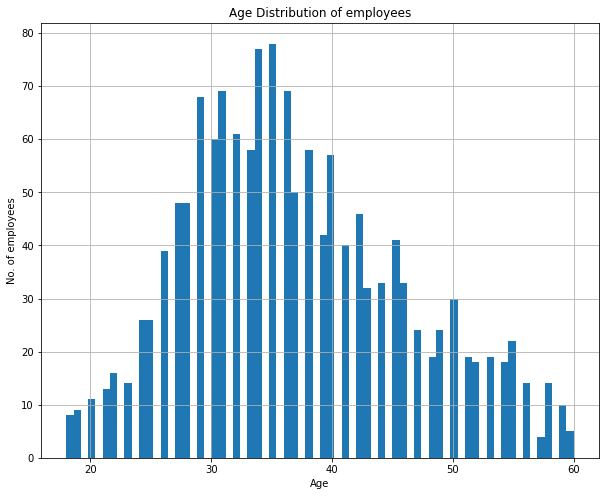

In [19]:
# Age Distribution of employee
plt.figure(figsize=(10,8))
dataset['Age'].hist(bins=70)
plt.title('Age Distribution of employees')
plt.xlabel('Age')
plt.ylabel('No. of employees')
plt.show()

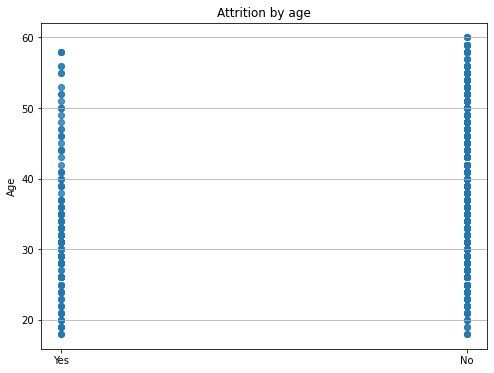

In [20]:
#exploring attrition by age
plt.figure(figsize=(8,6))
plt.scatter(dataset['Attrition'],dataset['Age'],alpha=.55)
plt.title("Attrition by age")
plt.ylabel('Age')
plt.grid(which='major',axis='y')
plt.show()

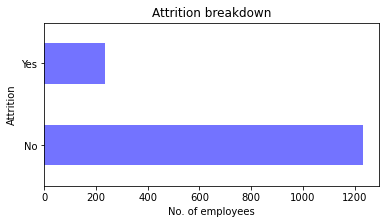

In [21]:
#explore data with left employees
plt.figure(figsize=(6,3))
dataset['Attrition'].value_counts().plot(kind='barh',color='blue',alpha=.55)
plt.title('Attrition breakdown')
plt.ylabel('Attrition')
plt.xlabel("No. of employees")
plt.show()

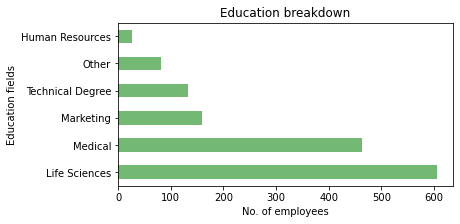

In [22]:
#explore the data for education field distribution 
plt.figure(figsize=(6,3))
dataset['EducationField'].value_counts().plot(kind='barh',color='g',alpha=.55)
plt.title('Education breakdown')
plt.ylabel('Education fields')
plt.xlabel("No. of employees")
plt.show()

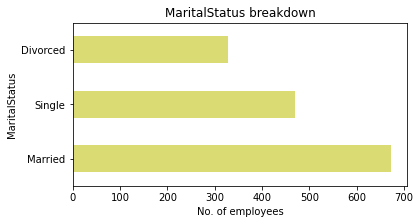

In [23]:
#explore data for Maritial status
plt.figure(figsize=(6,3))
dataset['MaritalStatus'].value_counts().plot(kind='barh',color='y',alpha=.55)
plt.title('MaritalStatus breakdown')
plt.ylabel('MaritalStatus')
plt.xlabel("No. of employees")
plt.show()

### Thank You!!